<font color = '#7B68EE'>
<font size = 60>

### Data analysis of life expectancy all over the world</font> 

<font color = '#8FBC8B'>

### Purpose : To research how various factors impact the duration of people's lives</font> 


<font color = '#8FBC8B'>

### Data: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who
### Group 12: Kateryna Shvahuliak, Nataliia Shcherba, Anastasiia Plaskonis, Iaroslav-Dmytro Strus, Iuliia Yurha</font> 

<font color = '#8FBC8B'>

### Step 0 : First of all we need to import all of the required libraries </font> 


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.stats.mstats import winsorize
import plotly.graph_objects as go
import plotly.express as px
from plotly.colors import n_colors

<font color = '#8FBC8B'>

### Step 1 : Import data and create DataFrame based on this data  </font> 

In [ ]:
data = pd.read_csv('Life Expectancy Data.csv')
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


<font color = '#8FBC8B'>

### Step 2: Find out the average duration of people's life between 2000 and 2015 in developed and developing countries  </font> 

<font size = '4'>

### We decided to visualize this data through both graphic and table to give more concrete perspective on this question. While table helps us to receive accurate data, graphic helps us to see a bigger picture and understand the overall situation  </font> 

In [ ]:

df_average = data.groupby(['Year', 'Status']).mean()['Life expectancy ']
df_average = pd.DataFrame(df_average)
df_average = df_average.reset_index().rename_axis(None, axis= 1)
df_average = df_average.pivot_table(['Life expectancy '], ['Year'], 'Status')
newdf = sns.light_palette('blue', as_cmap=True)
df_average.style.background_gradient(cmap=newdf)

/var/folders/cl/wqxhc67j255bdr0rmv_bl3580000gn/T/ipykernel_46891/1811190682.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_average = data.groupby(['Year', 'Status']).mean()['Life expectancy ']


In [ ]:
lifeyear = data.groupby(by=['Year', 'Status']).mean().reset_index()
developed = lifeyear.loc[lifeyear['Status'] == 'Developed',:]
developing = lifeyear.loc[lifeyear['Status'] == 'Developing',:]
fig = go.Figure()
for template in ['plotly_dark']:
    fig.add_trace(go.Scatter(x= developing['Year'], y=developing['Life expectancy '], mode = 'lines', name = 'Developing', marker_color = '#7B68EE'))
    fig.add_trace(go.Scatter(x=developed['Year'], y=developed['Life expectancy '], mode = 'lines', name = 'Developed', marker_color = '#8FBC8B'))
    fig.update_layout(height = 500,
    xaxis_title = 'Years',
    yaxis_title = 'Life expectancy in age',
    title_text = 'Average Life Expectancy of Developing and Developed countries by years',
    template=template)
fig.show()

/var/folders/cl/wqxhc67j255bdr0rmv_bl3580000gn/T/ipykernel_46891/3573132083.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<font color = '#8FBC8B'>

### Step 3: To see correlation between alcohol consumption and life expectancy  </font> 

<font size = 4>
We extract information from the column connected to alcohol consumption in developing countries and than take the 75 percent of its data to draw a line, which shows the alchohol consumption of the majority of population.

In [ ]:
developing = data.Alcohol[data.Status == 'Developing'].describe()
developing = developing['75%']

<font size = 4>
The same proces we repeat with developed countries 

In [ ]:
developed = data.Alcohol[data.Status == 'Developed'].describe()
developed = developed['75%']

<font size = 4>
Later we display graphic, which shows correlation between alcohol consumption and life expectancy

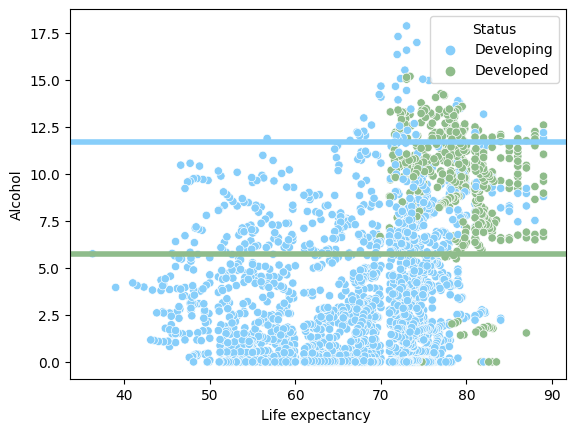

In [ ]:
sns.scatterplot(data, hue='Status', x = 'Life expectancy ', y = 'Alcohol',palette=['#87CEFA', '#8FBC8B'])
plt.axhline(developing, color = '#8FBC8B', linewidth = 4)
plt.axhline(developed, color = '#87CEFA', linewidth = 4)

<font color = '#8FBC8B'>

### Step 4: To see correlation between government's total expenditure on health sphere and life expectancy  </font> 

<AxesSubplot: xlabel='Total expenditure', ylabel='Life expectancy '>

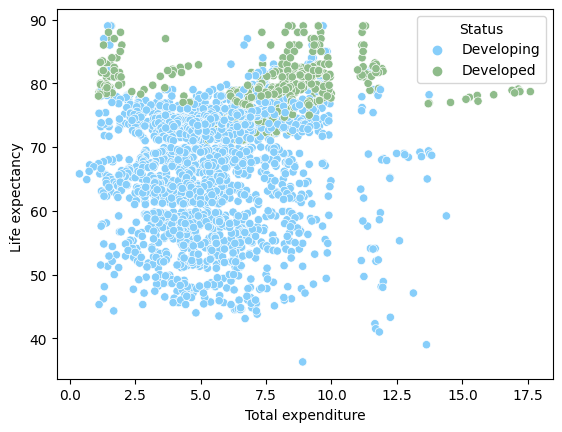

In [ ]:
sns.scatterplot(data, hue='Status', x = 'Total expenditure', y = 'Life expectancy ', palette=['#87CEFA', '#8FBC8B'])

<font color = '#8FBC8B'>

### Step 5: To see correlation between schooling and life expectancy  </font> 

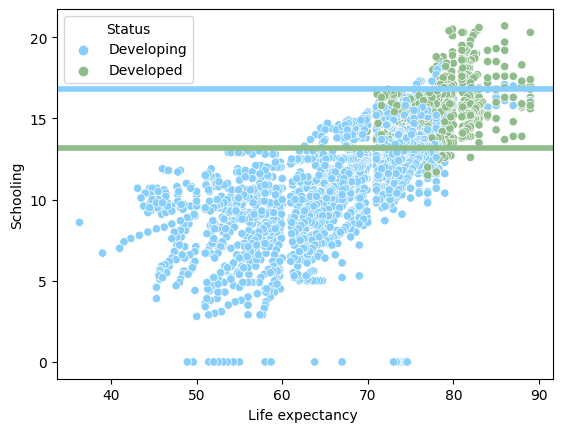

In [ ]:
developing_s = data.Schooling[data.Status == 'Developing'].describe()
developing_s = developing_s['75%']
developed_s = data.Schooling[data.Status == 'Developed'].describe()
developed_s = developed_s['75%']
sns.scatterplot(data, hue='Status', x = 'Life expectancy ', y = 'Schooling', palette=['#87CEFA', '#8FBC8B'])
plt.axhline(developing_s, color = '#8FBC8B', linewidth = 4)
plt.axhline(developed_s, color = '#87CEFA', linewidth = 4)

<font color = '#7B68EE'>
<font size = 5>

### Conclusion : life duration relies on many factors such as alcohol consumption, schooling, government's expenditure on health sphere and many others. For this reason life expectancy in the developed countries outweights the avarage length of life in developing countries.</font> 